# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


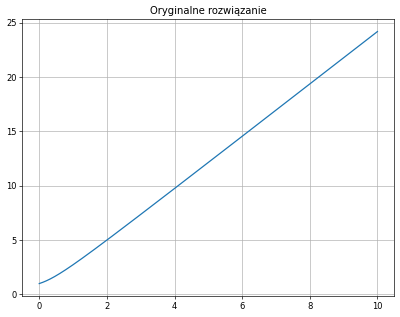

In [2]:
f_solve = lambda t : t + np.sqrt(1 + 2 * t * t)
t = np.linspace(0,10,10000)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,f_solve(t))
plt.title("Oryginalne rozwiązanie")
plt.grid()
plt.show()

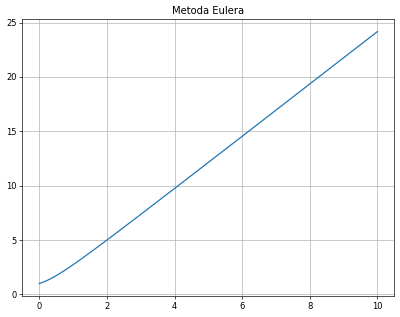

In [3]:
fun = lambda x,t : (x + t)/(x - t)
t = np.linspace(0,10,10000)
x = np.zeros((len(t),1))
x[0] = 1
solve = main.solve_euler(fun,t,x)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,solve)
plt.title("Metoda Eulera")
plt.grid()
plt.show()


***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

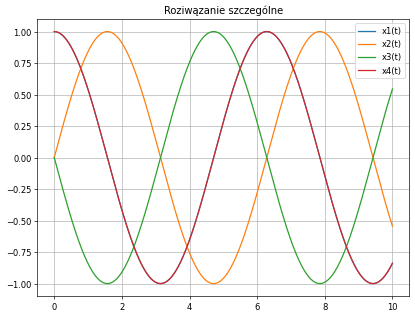

In [4]:
t = np.linspace(0,10,1000)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,np.cos(t))
plt.plot(t,np.sin(t))
plt.plot(t,-np.sin(t))
plt.plot(t,np.cos(t))
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.title("Roziwązanie szczególne")
plt.grid()
plt.show()

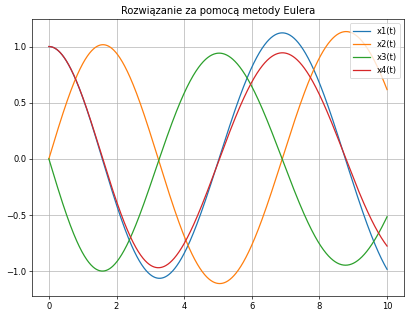

In [5]:
def foo(x,t):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0]/((x[0])**2 + (x[1])**2)**(3/2)
    x4 = -x[1]/((x[0])**2 + (x[1])**2)**(3/2)

    return np.array([x1,x2,x3,x4])

t = np.linspace(0,10,1000)
x = np.zeros((len(t),4))
x0 = [1,0,0,1]
for i in range(0,len(x0)):
    x[0][i] = x0[i]
y = main.solve_euler(foo,t,x)

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,y)
plt.title("Rozwiązanie za pomocą metody Eulera")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"],loc=1)
plt.grid()
plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

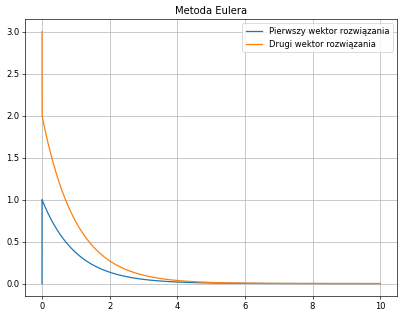

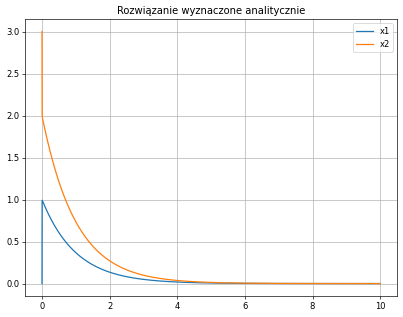

In [6]:
A = np.array([[-667,333], [666,-334]])
fun = lambda x,t: A @ x

t = np.linspace(0,10,10000)
x = np.zeros((len(t), 2))
x[0][0] = 0
x[0][1] = 3
y = main.solve_euler(fun, t, x)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,y[:, 0], label = 'Pierwszy wektor rozwiązania')
plt.plot(t,y[:, 1], label = 'Drugi wektor rozwiązania')
plt.title("Metoda Eulera")
plt.grid()
plt.legend()
plt.show()

## rozwiązanie analityczne
fun1 = lambda t : np.exp(-t) - np.exp(-1000*t)
fun2 = lambda t: 2*np.exp(-t) + np.exp(-1000*t)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(t,fun1(t), label = "x1")
plt.plot(t,fun2(t), label = "x2")
plt.title("Rozwiązanie wyznaczone analitycznie")
plt.legend()
plt.grid()
plt.show()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

None


ValueError: x, y, and format string must not be None

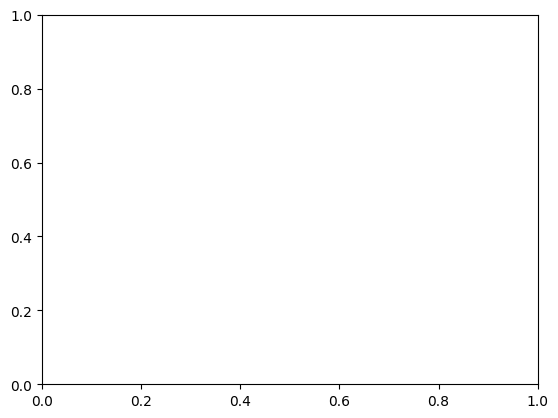

In [7]:
def foo(x,t):
    u = 0.012277471
    u2 = 1 - u
    D1 = ((y[0]+u)**2 + y[2]**2)**(3/2)
    D2 = ((y[0]-u2)**2 + y[2]**2)**(3/2)

    y1 = y[1]
    y2 = y[0] + 2*y[3] - u2*((y[0] + u)/D1) - u*((y[0] + u2)/D2)
    y3 = y[3]
    y4 = y[2] - 2*y[1] - u2*y[2]/D1 - u*y[2]/D2

    return np.array([y1,y2,y3,y4])

T = 17.0652165601579625588917206249
t = np.linspace(0,T,1000000)
x = np.zeros((len(t),4))
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

for i in range(0,len(x0)):
    x[0][i] = x0[i]
y = main.solve_euler(foo,t,x0)
print(y)
plt.plot(t,y)
plt.show()

In [ ]:
plt.plot(t,y)

WNIOSKI:
Na dzisiejszych zajęciach omawialiśmy numeryczne rozwiązywanie równań różniczkowych. Wykorzystaliśy do tego metodę Eulera. Jak się okazało w różnych przypadkach daje ona różne wyniki. Są przykłady tak jak w zadaniu 2 gdzie rozwiązanie bardzo dobrze pokrywa się z roziązaniem rzeczywistym oraz jak w zadaniu 3 gdzie rozwiązanie nieco się różni w jednym z przypadków. Jednak często metoda Eulera bedzie bardzo dobrym wyborem do rozwiązywanie równań różniczkowych jeśli nie korzystamy z solwerów takich jak ode45.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
